In [3]:
import numpy as np 
import pandas as pd 
import os

In [4]:
df = pd.read_csv("C:/Users/HP/Downloads/fake_news_dataset.csv")
df.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [5]:
print("="*40+" Checking NaN value "+"="*40)
columns_nan = []

print(f"Checking if any record with NaN value:")
for column in df.columns:
    print("="*60)
    print(f"Checking columns {column}")
    
    if df[column].isnull().sum() == 0:
        print(f"Column: {column} Ok!")
        print("="*60)
    else:
        print(f"Column: {column} Found NaN!")
        columns_nan.append({
            column: df[column].isnull().sum()
        })

for column in columns_nan:
    print(f"Found NaN values: {column}")

print()

print("="*40+" Duplicate records "+"="*40)
print(f"{df.duplicated().sum()} records duplicated")
print("Removing duplicated records...")
if df.duplicated().sum() > 0:
    print(f"Remove {df.duplicated().sum()} records !")
    df.drop_duplicates(inplace=True)
else:
    print("No duplicated value")

print("="*100)
print()

print("="*40+" Cheking Describe DataFrame "+"="*40)
df.describe()

======================================== Checking NaN value ========================================
Checking if any record with NaN value:
Checking columns title
Column: title Ok!
Checking columns text
Column: text Ok!
Checking columns date
Column: date Ok!
Checking columns source
Column: source Found NaN!
Checking columns author
Column: author Found NaN!
Checking columns category
Column: category Ok!
Checking columns label
Column: label Ok!
Found NaN values: {'source': np.int64(1000)}
Found NaN values: {'author': np.int64(1000)}

======================================== Duplicate records ========================================
0 records duplicated
Removing duplicated records...
No duplicated value

======================================== Cheking Describe DataFrame ========================================


,title,text,date,source,author,category,label
count,20000,20000,20000,19000,19000,20000,20000
unique,20000,20000,1096,8,17051,7,2
top,Foreign Democrat final.,more tax development both store agreement lawy...,2023-08-31,Daily News,Michael Smith,Health,fake
freq,1,1,32,2439,12,2922,10056


In [ ]:
# Initial Preprocessing 
df['source'] = df['source'].fillna(value='Others')
df['author'] = df['author'].fillna(value='Unknown')
df['label'] = df['label'].map(lambda x: 1 if x == 'real' else 0)
df['text_length'] = df['text'].str.len()
df['title_length'] = df['title'].str.len()

In [ ]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

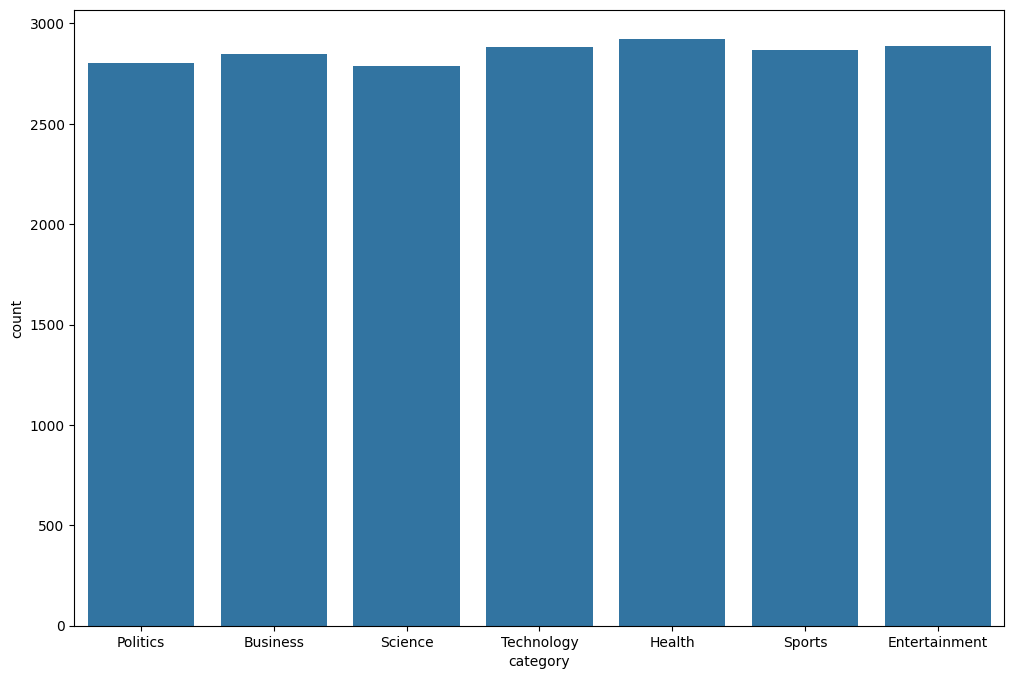

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x='category', data=df)
plt.show()

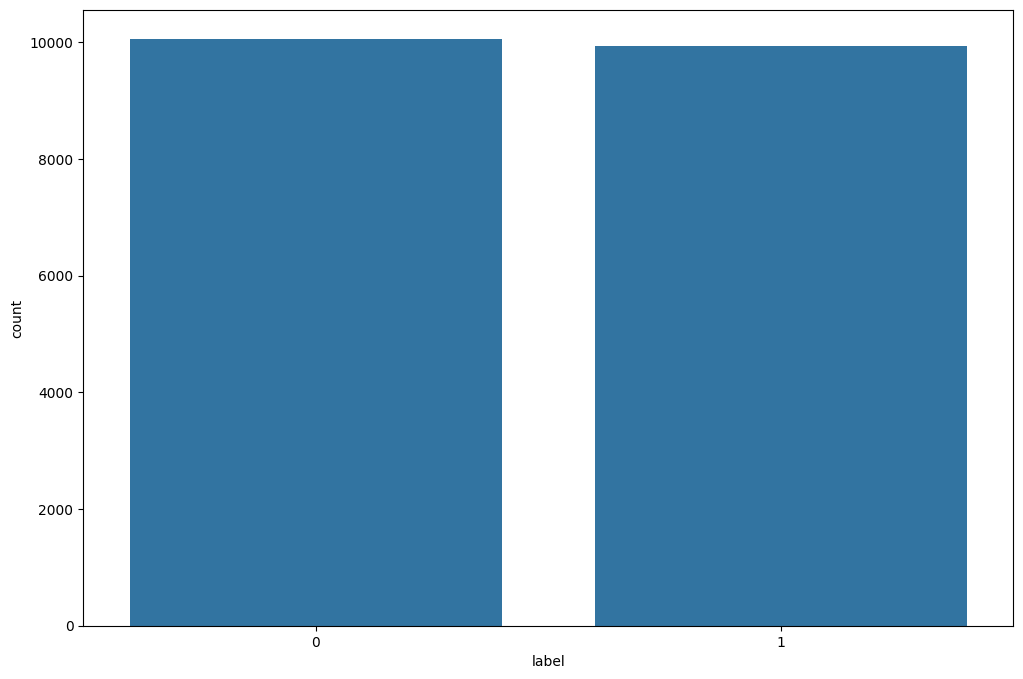

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='label', data=df)
plt.show()

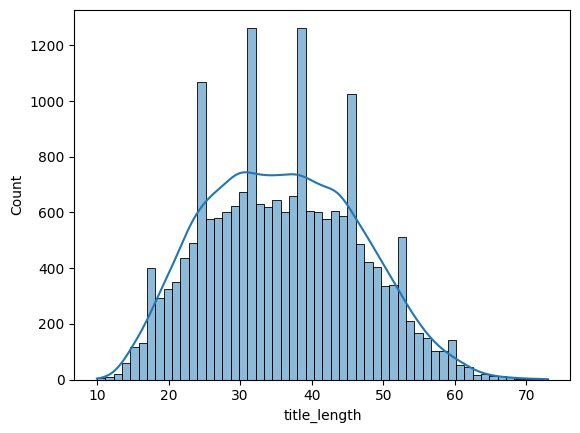

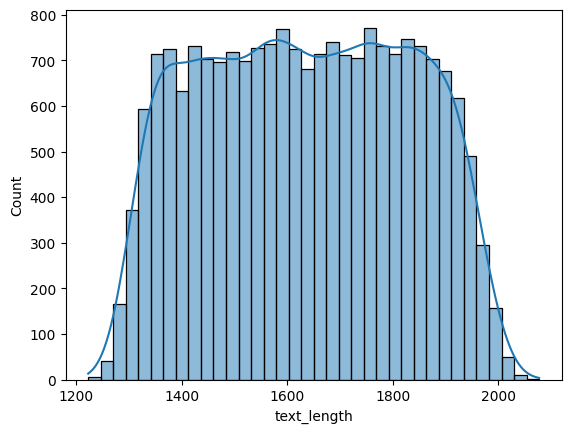

In [10]:
columns = ['title_length', 'text_length']

for column in columns:
    sns.histplot(x=column, data=df, kde=True)
    plt.show()

In [ ]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [12]:
text_vec = TfidfVectorizer(stop_words='english', max_features=1000, lowercase=True)

X = text_vec.fit_transform(df['text'])
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [14]:
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

Training model: Logistic Regression
Accuracy: 0.51
Precision: 0.5
Confusion Matrix:


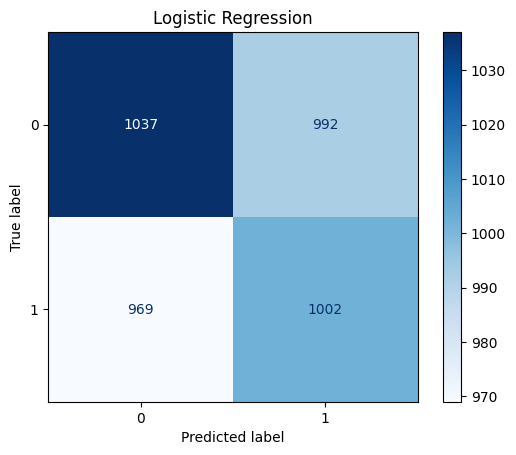

Training model: Random Forest


In [ ]:
for name, model in models.items():
    print("="*80)
    print(f"Training model: {name}")
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
        
    print(f"Accuracy: {round(acc, 2)}")
    print(f"Precision: {round(precision, 2)}")

    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_disp.plot(cmap='Blues')
    plt.title(name)
    plt.show()